In [ ]:
from google.colab import files

# Paso 1: Subir los archivos desde la computadora
uploaded = files.upload()

Saving bigd (1).xlsx to bigd (1).xlsx


# **Entrenamiento inicial y exploración de los datos.**

          X         Y  Z
0 -1.668722  0.435901 -1
1  0.748796 -0.430965  1
2 -0.987100  0.685791 -1
3  0.017450 -0.155748  1
4 -0.996445 -0.824641 -1

Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       400 non-null    float64
 1   Y       400 non-null    float64
 2   Z       400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB
None

Descripción estadística de las variables numéricas:
                X           Y           Z
count  400.000000  400.000000  400.000000
mean     0.183823   -0.029856   -0.085000
std      3.978502    3.735211    0.997629
min     -8.668648   -8.939078   -1.000000
25%     -1.510957   -1.779997   -1.000000
50%     -0.003660   -0.069577   -1.000000
75%      1.905326    1.744649    1.000000
max      8.664151    8.906369    1.000000

Valores nulos por columna:
X    0
Y    0
Z    0
dtyp

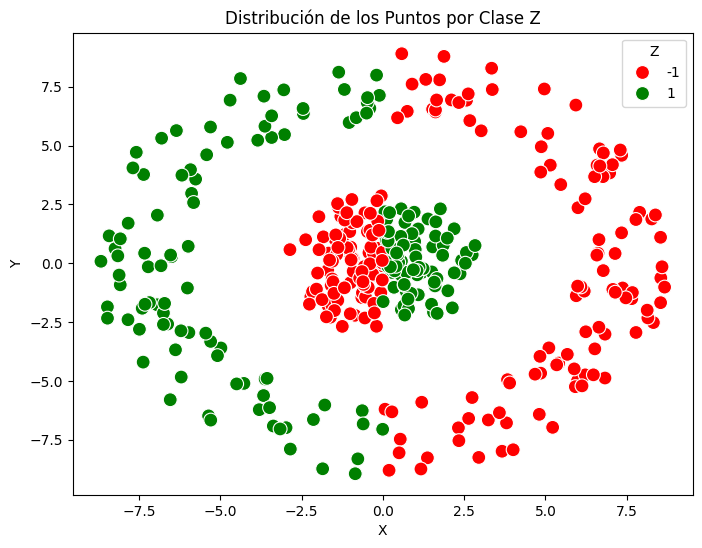

Tamaño del conjunto de entrenamiento: (320, 2)
Tamaño del conjunto de prueba: (80, 2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5609 - loss: 0.6845 - val_accuracy: 0.5875 - val_loss: 0.6865
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5476 - loss: 0.6808 - val_accuracy: 0.5375 - val_loss: 0.6811
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6293 - loss: 0.6720 - val_accuracy: 0.6250 - val_loss: 0.6759
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5988 - loss: 0.6684 - val_accuracy: 0.6250 - val_loss: 0.6701
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6567 - loss: 0.6478 - val_accuracy: 0.6250 - val_loss: 0.6632
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6519 - loss: 0.6459 - val_accuracy: 0.6375 - val_loss: 0.6540
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6606 - loss: 0.6376 - val_accuracy: 0.6500 - val_loss: 0.6438
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6736 - loss: 0.6150 - val_accuracy: 0.6625 -

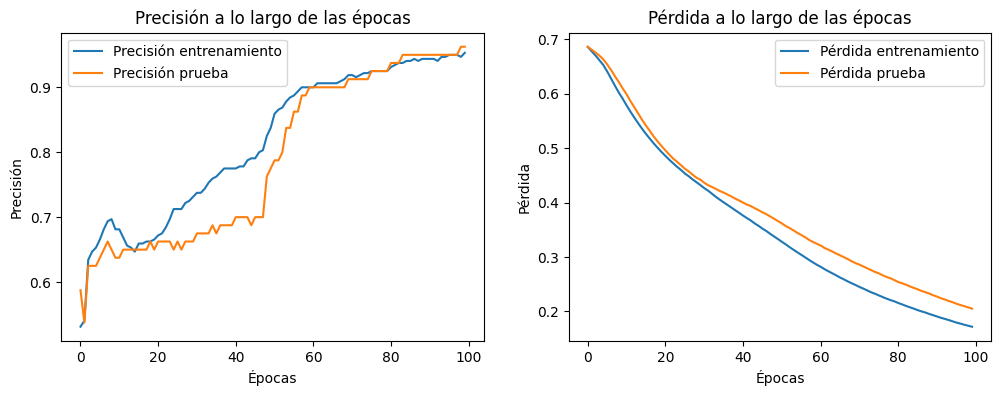

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Paso 1: Cargar el dataset
df = pd.read_excel('bigd (1).xlsx')

# Mostrar las primeras filas del dataset para verificar que se ha cargado correctamente
print(df.head())

# Resumen de la estructura del dataset
print("\nResumen del dataset:")
print(df.info())

# Descripción estadística de las variables numéricas
print("\nDescripción estadística de las variables numéricas:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Visualización de los puntos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='Y', hue='Z', data=df, palette={-1: 'red', 1: 'green'}, s=100)
plt.title('Distribución de los Puntos por Clase Z')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Convertir la columna Z a 0 y 1 para que sea adecuada para clasificación binaria
df['Z'] = df['Z'].apply(lambda x: 1 if x == 1 else 0)

# Separar las características (X, Y) y la variable objetivo (Z)
X = df[['X', 'Y']].values
y = df['Z'].values

# Paso 2: Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de cada conjunto
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

# Paso 3: Escalar los datos (normalización)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Paso 4: Crear el modelo secuencial
model = Sequential()

# Agregar las capas de la red
model.add(Dense(10, input_dim=2, activation='relu'))  # Capa oculta con 10 neuronas y activación ReLU
model.add(Dense(5, activation='relu'))  # Otra capa oculta con 5 neuronas y activación ReLU
model.add(Dense(1, activation='sigmoid'))  # Capa de salida con activación sigmoide para clasificación binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Paso 5: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Paso 6: Evaluar el modelo en el conjunto de prueba
precision_test = model.evaluate(X_test, y_test, verbose=0)[1] * 100
print(f"Precisión del modelo en el conjunto de prueba: {precision_test:.2f}%")

# Evaluar el modelo en el conjunto de entrenamiento
precision_train = model.evaluate(X_train, y_train, verbose=0)[1] * 100
print(f"Precisión del modelo en el conjunto de entrenamiento: {precision_train:.2f}%")

# Visualizar la precisión y la pérdida a lo largo de las épocas
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión prueba')
plt.title('Precisión a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida prueba')
plt.title('Pérdida a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()
